<a href="https://colab.research.google.com/github/IsWallison/ML-for-everybody/blob/main/Projeto_Detec%C3%A7%C3%A3o_de_Fraude_em_Cart%C3%B5es_de_Cr%C3%A9dito.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

---
<img alt="Colaboratory logo" width="15%" src="https://raw.githubusercontent.com/carlosfab/escola-data-science/master/img/novo_logo_bg_claro.png">

#### **Data Science na Prática 3.0**
*by [sigmoidal.ai](https://sigmoidal.ai)*  

---

# Detecção de Fraudes em Cartões de Crédito

Neste projeto, iremos abordar o problema das fraudes em cartões de crédito, uma das principais preocupações das instituições financeiras como bancos e *fintechs*. Apenas no Brasil, cerca de 12,1 milhões de pessoas já foram vítimas de algum tipo de fraude financeira no último ano. Traduzindo em valores, os golpes financeiros ultrapassaram a cifra de R$ 1,8 bilhão de prejuízo por ano para os últimos 12 meses.

<p align=center>
<img src="https://images.unsplash.com/photo-1592772874383-d08932d29db7?ixid=MnwxMjA3fDB8MHxwaG90by1wYWdlfHx8fGVufDB8fHx8&ixlib=rb-1.2.1&auto=format&fit=crop&w=699&q=80" width="60%"></p>

Dentra essas fraudes, aquelas envolvendo cartões de crédito são de grande relevância uma vez que a sua não-detecção acaretará em prejuízos consideráveis, tanto para o consumidor quanto para a instituição financeira.

Um outro fator a ser considerado é a quantidade de falsos positivos, ou seja, aquelas vezes em que você tentou fazer uma compra e teve seu cartão bloqueado preventivamente - o que provavelmente gerou estresse e constrangimento.

Por todos esses motivos, o investimento na área de detecção de fraudes por meio de Inteligência Artificial vem crescendo a cada ano, representando uma grande oportunidade em *Data Science*. 

Dispondo de grandes volumes de dados como base histórica, um algoritmo de machine learning apenas um pouco melhor que os anteriores já representa uma economia de milhões de Reais. E esse é o desafio, aprimorar cada vez mais o uso de algoritmos visando inibir ou evitar transações fraudulentas.

## Importando os Dados

Os dados que usaremos neste projeto foram disponibilizados por algumas empresas européias de cartão de crédito. O *dataset* representa as operações financeiras que aconteceram no período de dois dias, onde foram classificadas 492 fraudes em meio a quase 290 mil transações.

Como você pode notar, este é um conjunto de dados extremamente desbalanceado, onde as fraudes representam apenas 0,17% do total.

Outro detalhe interessante é que as *features* são todas numéricas, e foram descaracterizadas (por problemas ligados à privacidade e segurança). Assim, os nomes das colunas são representados por $[V1, V2, V3 \dots, V28]$ 

<p align=center>
<img src="https://images.unsplash.com/photo-1620714223084-8fcacc6dfd8d?ixid=MnwxMjA3fDB8MHxwaG90by1wYWdlfHx8fGVufDB8fHx8&ixlib=rb-1.2.1&auto=format&fit=crop&w=1051&q=80" width="50%"></p>

[Na página original dos dados](https://www.kaggle.com/mlg-ulb/creditcardfraud), também é informado que as variáveis passaram por uma transformação conhecida como Análise de Componentes Principais (*Principal Component Analysis* - PCA).

A PCA permite a redução da dimensionalidade enquanto mantém o maior número possível de informações. Para conseguir isso, o algoritmo encontra um conjunto novo de recursos - os chamados **componentes**.

Esses componentes são em número menor or igual às variáveis originais. No caso deste projeto, os componentes achados pela transformação da PCA são as próprias colunas $[V1, V2, V3 \dots, V28]$.

In [1]:
# importar os pacotes necessários
!pip install scikit-plot
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scikitplot as skplt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score, roc_curve, accuracy_score
from sklearn.metrics import mean_absolute_error


from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, mean_absolute_error, mean_squared_error
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression

from imblearn.under_sampling import RandomUnderSampler
import warnings
warnings.filterwarnings('ignore')

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Para facilitar a aquisição dos dados, criei um *link* com acesso direto ao `csv`. Com isso, basta importar o conjunto de dados usando o método `pd.read_csv()`.

In [2]:
file_path = "https://www.dropbox.com/s/b44o3t3ehmnx2b7/creditcard.csv?dl=1"

# importar os dados para um dataframe
df = pd.read_csv(file_path)

# dimensões do conjunto original
print("Dimensões do Conjunto Original: ", df.shape)

# criando o conjunto de teste
test = df.sample(frac=0.15, random_state=0)

# drop das linhas de teste
df = df.drop(test.index)

# verificando o conjunto
print("Dimensões do Conjunto de Teste: ", test.shape)
print("Dimensões do Conjunto de Treino: ", df.shape)

Dimensões do Conjunto Original:  (284807, 31)
Dimensões do Conjunto de Teste:  (42721, 31)
Dimensões do Conjunto de Treino:  (242086, 31)


Com os dados importados para dentro de uma estrutura *Dataframe* - e não havendo a necessidade de mais nenhum ajuste ou configuração nesta etapa, pode-se iniciar uma análise exploratória dos dados a fim de preparar um modelo de *Machine Learning*.

Lembre-se de realizar o *split* dos conjuntos, para evitar o vazamento de dados.

Feito isso, vamos à Análise Exploratória.

## Análise Exploratória

Abordar tópicos/informações como:

* Ver as 5 primeiras entradas
* Ver o resumo estatístico do dataframe
* Verificar se há valores ausentes
* Plotar um gráfico de barras (ou countplot) para ver o balanceamento do *dataset*
* Plotar os seguintes histogramas:
    * Variável `Time`
        * Fraude (`Class == 1`)
        * Normal (`Class == 0`)
    * Variável `Amount`
        * Fraude (`Class == 1`)
        * Normal (`Class == 0`)
* Plotar um `boxplot` para a variável `Amount` quando houve fraude (`Class == 1`)
* Plotar uma matriz de correlação

In [3]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,242086.000000,242086.000000,242086.000000,242086.000000,242086.000000,242086.000000,242086.000000,242086.000000,242086.000000,242086.000000,...,242086.000000,242086.000000,242086.000000,242086.000000,242086.000000,242086.000000,242086.000000,242086.000000,242086.000000,242086.000000
mean,94857.597379,0.001456,-0.000800,-0.001004,0.000647,-0.000986,-0.001196,-0.000033,-0.000416,-0.000725,...,-0.000015,0.000606,-0.000482,0.000199,0.000048,-0.000269,-0.000727,0.000065,88.612429,0.001727
std,47490.660832,1.956513,1.654883,1.514580,1.417228,1.366284,1.326879,1.223095,1.199718,1.099350,...,0.734189,0.726284,0.629651,0.605150,0.521574,0.482084,0.401490,0.327734,247.655020,0.041517
min,0.000000,-56.407510,-72.715728,-33.680984,-5.683171,-42.147898,-26.160506,-43.557242,-73.216718,-13.434066,...,-34.830382,-10.933144,-44.807735,-2.822684,-10.295397,-2.604551,-22.565679,-11.710896,0.000000,0.000000
25%,54234.000000,-0.920406,-0.598659,-0.893374,-0.848236,-0.693615,-0.769025,-0.553805,-0.208857,-0.645058,...,-0.228492,-0.542962,-0.161941,-0.354494,-0.316853,-0.327387,-0.070744,-0.052903,5.662500,0.000000
50%,84747.000000,0.019230,0.064567,0.177607,-0.018959,-0.054544,-0.274310,0.040344,0.022160,-0.051370,...,-0.028987,0.007162,-0.011175,0.040764,0.017175,-0.052337,0.001131,0.011209,22.000000,0.000000
75%,139362.000000,1.316034,0.803174,1.026561,0.743691,0.611455,0.397688,0.570104,0.327186,0.597195,...,0.187064,0.529814,0.147358,0.439320,0.350795,0.241214,0.090776,0.078234,77.580000,0.000000
max,172792.000000,2.451888,22.057729,9.382558,16.875344,34.801666,23.917837,44.054461,20.007208,15.594995,...,27.202839,10.503090,22.528412,4.022866,7.519589,3.517346,12.152401,33.847808,19656.530000,1.000000


In [5]:
df.isnull().sum().max()

0

0    241668
1       418
Name: Class, dtype: int64
Fraudes representam 0.173% do dataset.



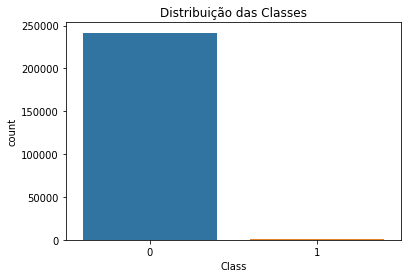

In [6]:
print(df['Class'].value_counts())
print(f"Fraudes representam {(((df['Class']==1).sum())/df.shape[0]*100):.3f}% do dataset.")
fig, ax = plt.subplots();
sns.countplot('Class', data=df, ax=ax);
ax.set_title('Distribuição das Classes');
print()


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 242086 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    242086 non-null  float64
 1   V1      242086 non-null  float64
 2   V2      242086 non-null  float64
 3   V3      242086 non-null  float64
 4   V4      242086 non-null  float64
 5   V5      242086 non-null  float64
 6   V6      242086 non-null  float64
 7   V7      242086 non-null  float64
 8   V8      242086 non-null  float64
 9   V9      242086 non-null  float64
 10  V10     242086 non-null  float64
 11  V11     242086 non-null  float64
 12  V12     242086 non-null  float64
 13  V13     242086 non-null  float64
 14  V14     242086 non-null  float64
 15  V15     242086 non-null  float64
 16  V16     242086 non-null  float64
 17  V17     242086 non-null  float64
 18  V18     242086 non-null  float64
 19  V19     242086 non-null  float64
 20  V20     242086 non-null  float64
 21  V21     24

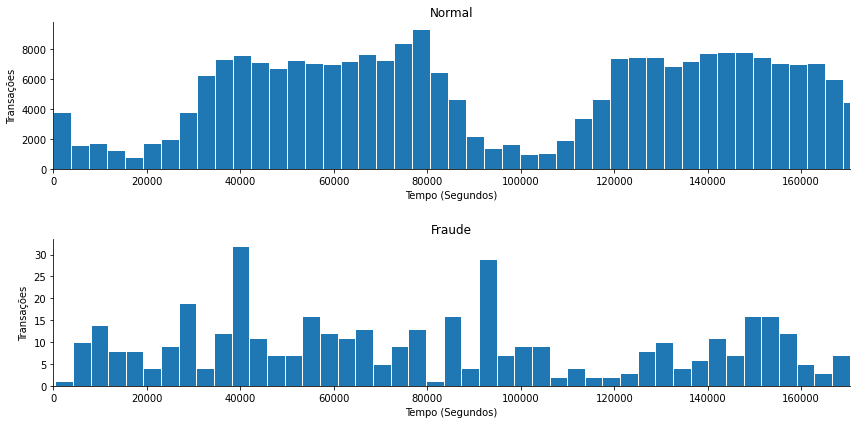

In [8]:
fig, (ax1,ax2) = plt.subplots(nrows=2, ncols=1, figsize=(12,6));

num_bins = 45
df['Time'][df['Class'] == 0].hist(ax=ax1,bins=num_bins,edgecolor="white", linewidth=1)
df['Time'][df['Class'] == 1].hist(ax=ax2,bins=num_bins,edgecolor="white", linewidth=1)

ax1.set_title("Normal")
ax1.set_xlabel("Tempo (Segundos)\n")
ax1.set_ylabel("Transações")
ax1.grid(visible=None)
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)
ax1.set_xlim(0, (df['Time'][df['Class'] == 1].max()))

ax2.set_title("Fraude")
ax2.set_xlabel("Tempo (Segundos)")
ax2.set_ylabel("Transações")
ax2.grid(visible=None)
ax2.spines['top'].set_visible(False)
ax2.spines['right'].set_visible(False)
ax2.set_xlim(0, (df['Time'][df['Class'] == 1].max()))


plt.tight_layout()

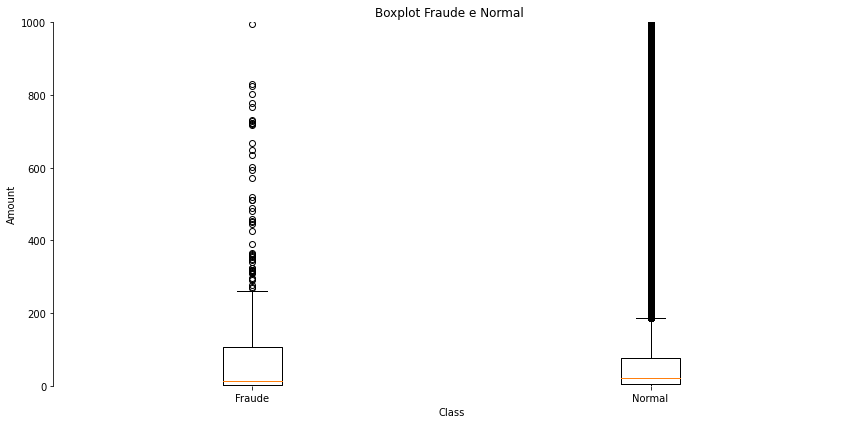

In [9]:
fig, ax = plt.subplots(figsize=(12,6))

# Plot the first box plot using the first dataset
ax.boxplot(df['Amount'][df['Class'] == 1], positions=[1])

# Plot the second box plot using the second dataset
ax.boxplot(df['Amount'][df['Class'] == 0], positions=[2])

ax.set_title("Boxplot Fraude e Normal ")
ax.set_xlabel("Class")
ax.set_ylabel("Amount")
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.set_xticks([])   # remove y-tick labels for the first subplot
ax.set_ylim(0, 1000)
plt.xticks([2, 1], ['Normal', 'Fraude'])




plt.subplots_adjust(wspace=100, hspace=-50)

plt.tight_layout()

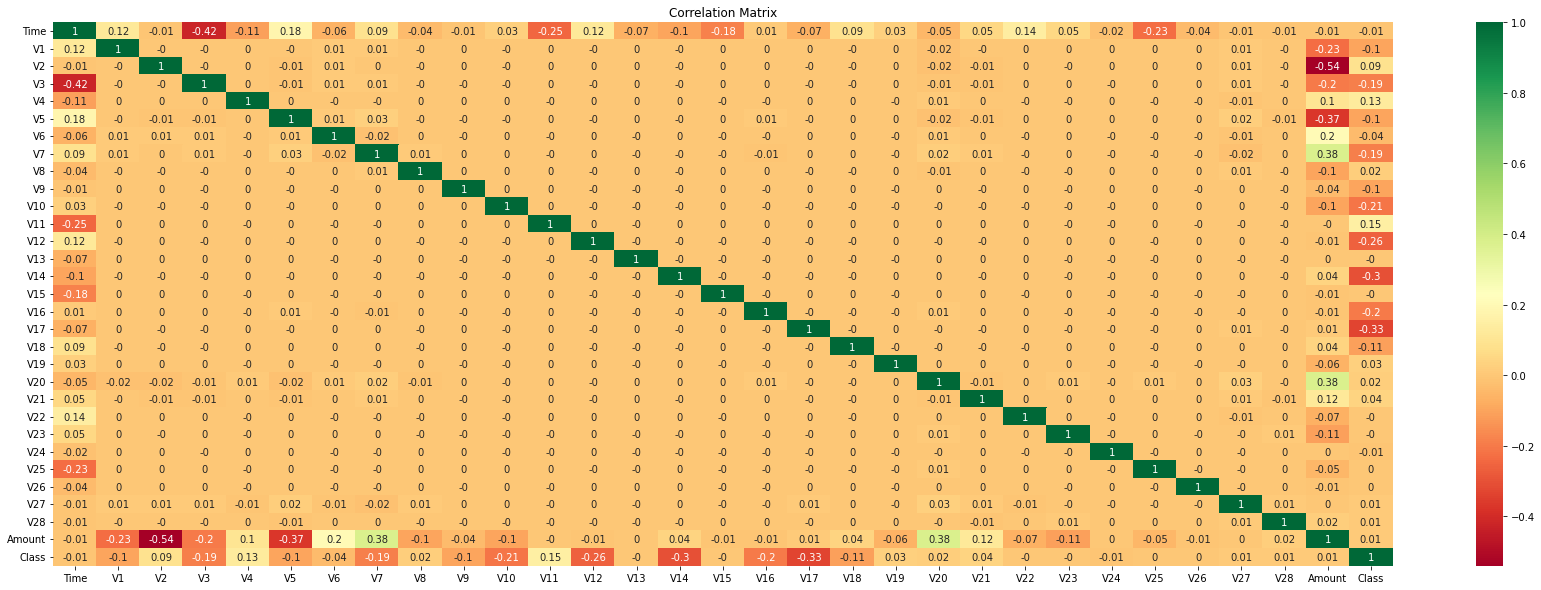

In [10]:
corr = df.corr()
corr= corr.round(2)

# Create a figure and an Axes object
fig, ax = plt.subplots(figsize=(30, 10))

# Plot the heatmap
sns.heatmap(corr, cmap='RdYlGn', annot=True, ax=ax,)

# Set the title
ax.set_title("Correlation Matrix")

# Show the plot
plt.show()

## Preparação dos Dados

* Normalizar os dados que ainda não haviam sido pré-processados (`Time` e `Amount`)
* Dividir o conjunto de dados entre treino e validação
* [*Recomendado*] Balancear o conjunto de dados

In [33]:
df_clean = df.copy()

std_scaler = StandardScaler()
df_clean['std_amount'] = std_scaler.fit_transform(df_clean['Amount'].values.reshape(-1, 1))
df_clean['std_time'] = std_scaler.fit_transform(df_clean['Time'].values.reshape(-1, 1))

df_clean.drop(['Time', 'Amount'], axis=1, inplace=True)

# ver as primeiras entradas
df_clean.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V22,V23,V24,V25,V26,V27,V28,Class,std_amount,std_time
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0,0.246341,-1.997399
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0,-0.346945,-1.997399
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0,1.171178,-1.997378
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0,0.140872,-1.997378
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0,-0.075195,-1.997357


In [37]:
# separar variáveis entre X e y com as colunas escolhidas y vai ser ser o alvo 
X = df_clean.drop('Class', axis=1)
y = df['Class']

# dividir o dataset entre treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1,stratify=y, shuffle=True)

print('X Train : ', train_X.shape)
print('Test : ', X_test.shape)
print('Y Train : ', y_train.shape)
print('y Test : ',y_test.shape)

X Train :  (181564, 30)
Test :  (60522, 30)
Y Train :  (181564,)
y Test :  (60522,)


##KNN

In [38]:
#Getting the best parammer
mae1 = 10
for i in range(1,50):
  knn_model = KNeighborsClassifier(n_neighbors=i)
  knn_model.fit(X_train, y_train)
  y_pred = knn_model.predict(X_test)
  mae = mean_absolute_error(y_test, y_pred)
  if mae < mae1:
    mae1 = mae
    n_nei = i

  # mse = mean_squared_error(y_test, y_pred)
  # rmse = np.sqrt(mse)
  # if rmse < mae1:
  #   mae1 = rmse
  #   n_nei = i
print(n_nei)


3


In [ ]:
knn_model = KNeighborsClassifier(n_neighbors = 3)
knn_model.fit(X_train, y_train)
y_pred = knn_model.predict(X_test)

In [ ]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print("MAE:", mae)
print("RMSE:", rmse)
print(classification_report(y_test, y_pred))

## Naive Bayes

In [ ]:
nb_model = GaussianNB()
nb_model = nb_model.fit(X_train, y_train)
y_pred = nb_model.predict(X_test)

In [ ]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print("MAE:", mae)
print("RMSE:", rmse)
print(classification_report(y_test, y_pred))

##Logistic Regretion

In [ ]:
#Criar o modelo e treinar 
model = LogisticRegression(random_state=1)
model.fit(train_X,train_y)

#validar com outros dados
val_model= model.predict(val_X)

# ver a precisão do modelo 
val_mae= mean_absolute_error(val_y, val_model)
print(classification_report(val_y, val_model, digits=4))
print(val_mae)

In [ ]:
# usar técnica under-sampling para balancear o conjunto de dado
rus = RandomUnderSampler()
X_rus, y_rus = rus.fit_resample(train_X, train_y)

#Criar o modelo e treinar 
model = LogisticRegression(random_state=1)
model.fit(X_rus,y_rus)

#validar com outros dados
val_model= model.predict(val_X)

# ver a precisão do modelo 
val_mae= mean_absolute_error(val_y, val_model)
print(classification_report(val_y, val_model, digits=4))
print(val_mae)

              precision    recall  f1-score   support

           0     0.9998    0.9538    0.9763     60417
           1     0.0329    0.9048    0.0635       105

    accuracy                         0.9537     60522
   macro avg     0.5164    0.9293    0.5199     60522
weighted avg     0.9981    0.9537    0.9747     60522

0.04628069131885926


In [ ]:
x_pred = model.predict(X)

In [ ]:
val_mae= mean_absolute_error(x_pred, y)

In [ ]:
print(val_mae)
print(classification_report(x_pred, y, digits=4))

0.04656609634592666
              precision    recall  f1-score   support

           0     0.9535    0.9999    0.9761    230459
           1     0.9234    0.0332    0.0641     11627

    accuracy                         0.9534    242086
   macro avg     0.9385    0.5165    0.5201    242086
weighted avg     0.9520    0.9534    0.9323    242086



## Modelo de Machine Learning

* Construir um modelo para **classificação**.
* [*Opcional*] Construir mais de um modelo para avaliar os desempenhos

## Avaliar o desempenho do modelo

* Identificar a melhor métrica para esse tipo de modelo
* [*Opcional*] Comparar o desempenho entre diversos modelos

## Conclusão

* Escrever suas conclusões a respeito da construção do modelo